# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Department of Cognitive Science and Artificial Intelligence,
Tilburg University
Academic Year 2024-2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Spatiotemporal Data/Assignment Part 1

/content/drive/MyDrive/Colab Notebooks/Spatiotemporal Data/Assignment Part 1


In [ ]:
# !pip install numpy==1.24.4

In [ ]:
!pip install sktime
!pip install statsmodels
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.5 MB/s eta 0:00:00


In [ ]:
import datetime as datetime
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sktime.utils.plotting import plot_correlations, plot_series
from sktime.transformations.series.detrend import STLTransformer
import statsmodels.api as sm
from scipy.stats import norm
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from itertools import product
from sktime.forecasting.arima import ARIMA
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.dists_kernels import FlatDist, ScipyDist
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor
from sklearn.metrics import get_scorer, make_scorer, mean_absolute_percentage_error

# Part 1A
## Time series analysis and forecasting of patient arrivals in an
emergency department

1. [5 points] Load the dataset. Display the temporal autocorelation and partial autocorrelation in a plot.
Points breakdown: 3 points for displaying the autocorrelation. 2 points for loading the dataset..

In [ ]:
# load the dataset
ed = pd.read_csv('ed_time_series.csv', header=0, index_col=0, parse_dates=True)
print(ed.shape)
print(ed.head())

(1400, 1)
            Arrivals
Date                
2014-01-01        90
2014-01-02        97
2014-01-03        80
2014-01-04        92
2014-01-05        76


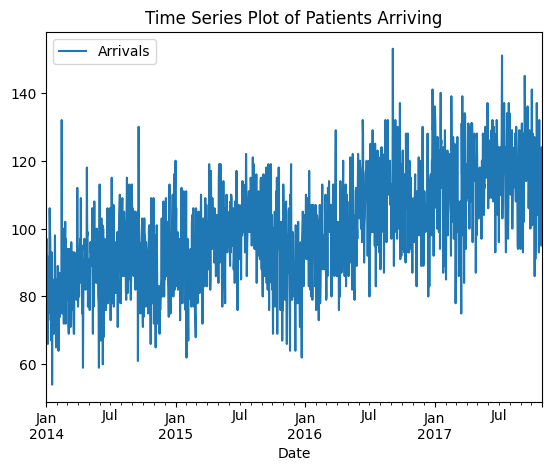

In [ ]:
# plot the time series
ed.plot()
plt.title('Time Series Plot of Patients Arriving')
plt.show()

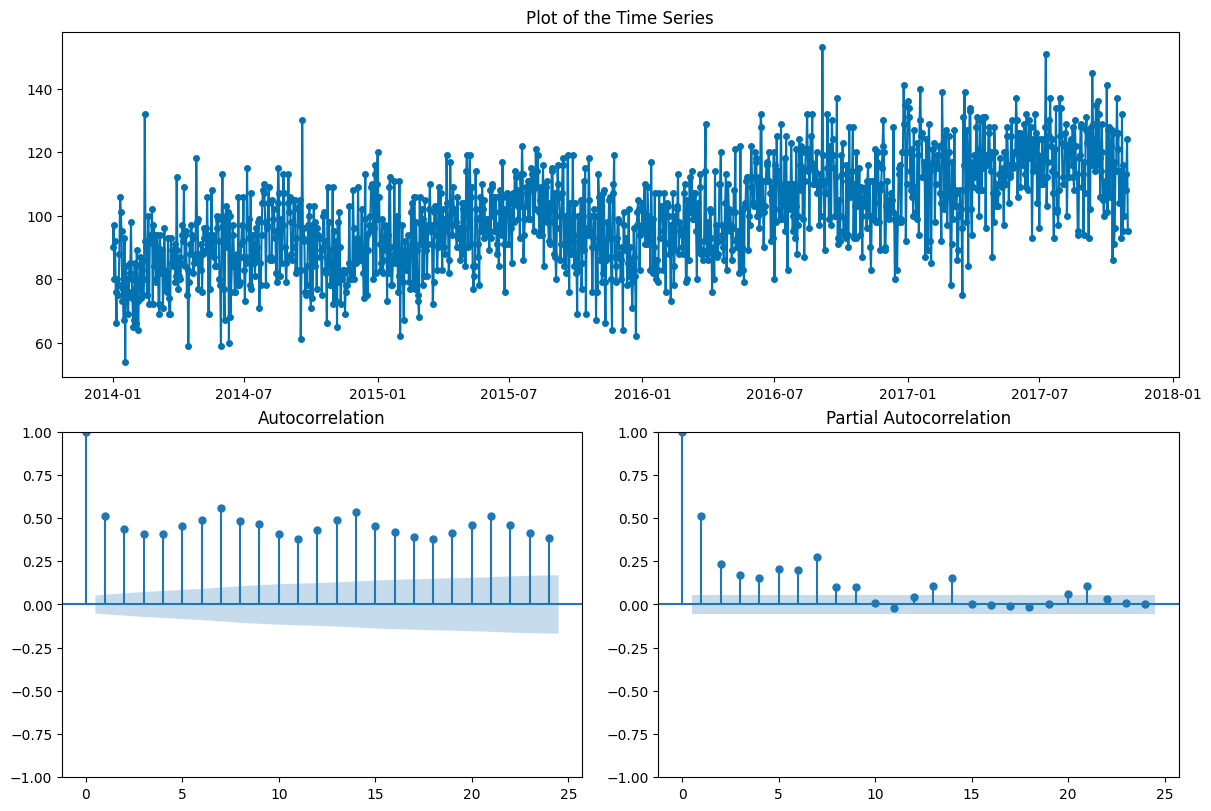

In [ ]:
# plot autocorrelation and partial autocorrelation
plot_correlations(ed, series_title='Plot of the Time Series')
plt.show()

2. [10 points] Separate the trend, seasonal and residual noise components. Try three di
erent periodicity
inputs; 7 days, 30 days and 365 days. Display each component separately for each periodicity. For each decompsition for given the periodicty, display the residual noise as a scatter plot as well as the temporal
autocorrelation and partial autocorrelation of the residual noise. Are there are cyclic, trend or seasonal
e
ects which are unaccounted for each periodicity value? From your interpretation of the residual plots
and components, which of the three periodicity values is preferred?
Points breakdown: 3 points for separating the trend, 2 points for displaying each component. 3 points
for the scatter plot, histogram plot of the residuals and 2 points for your intepreration..

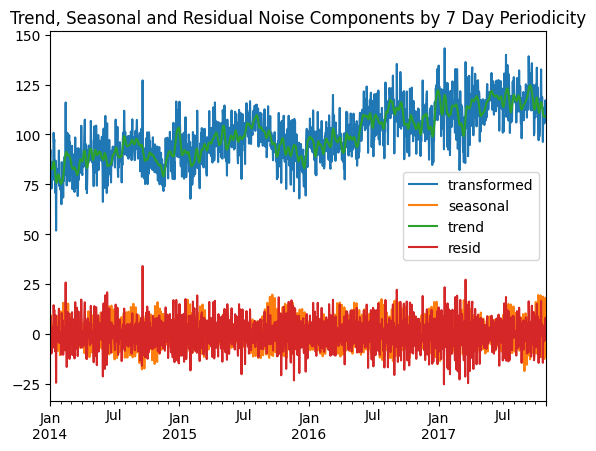

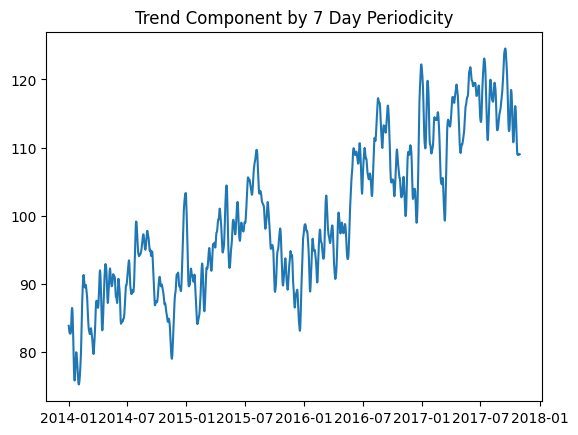

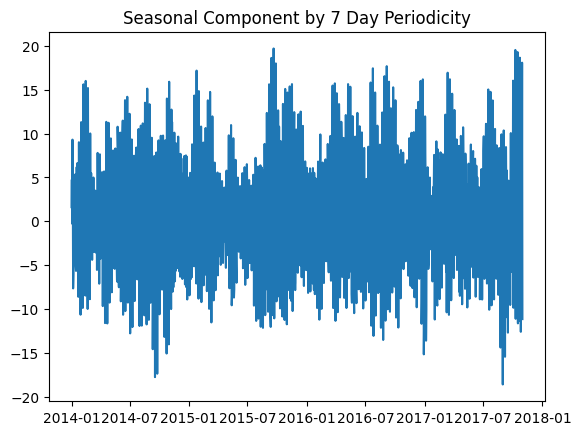

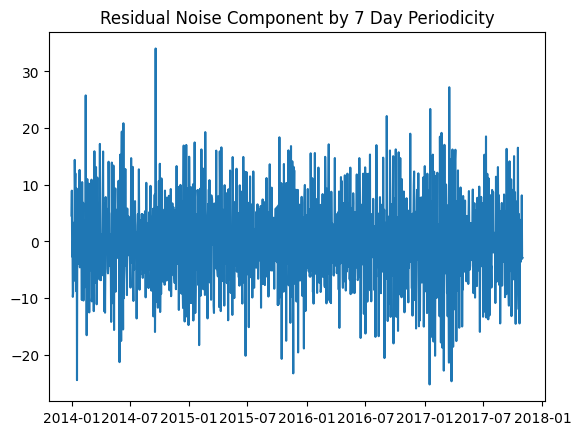

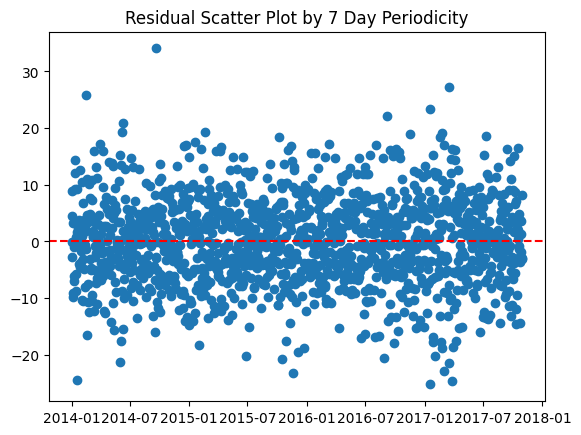

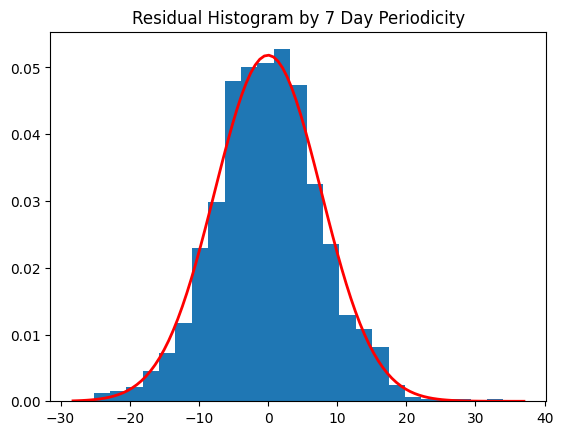

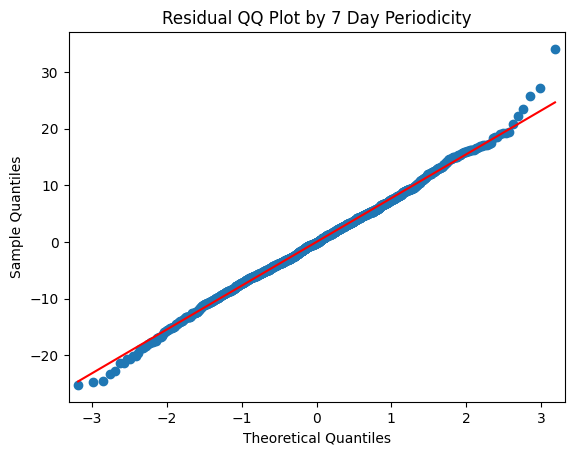

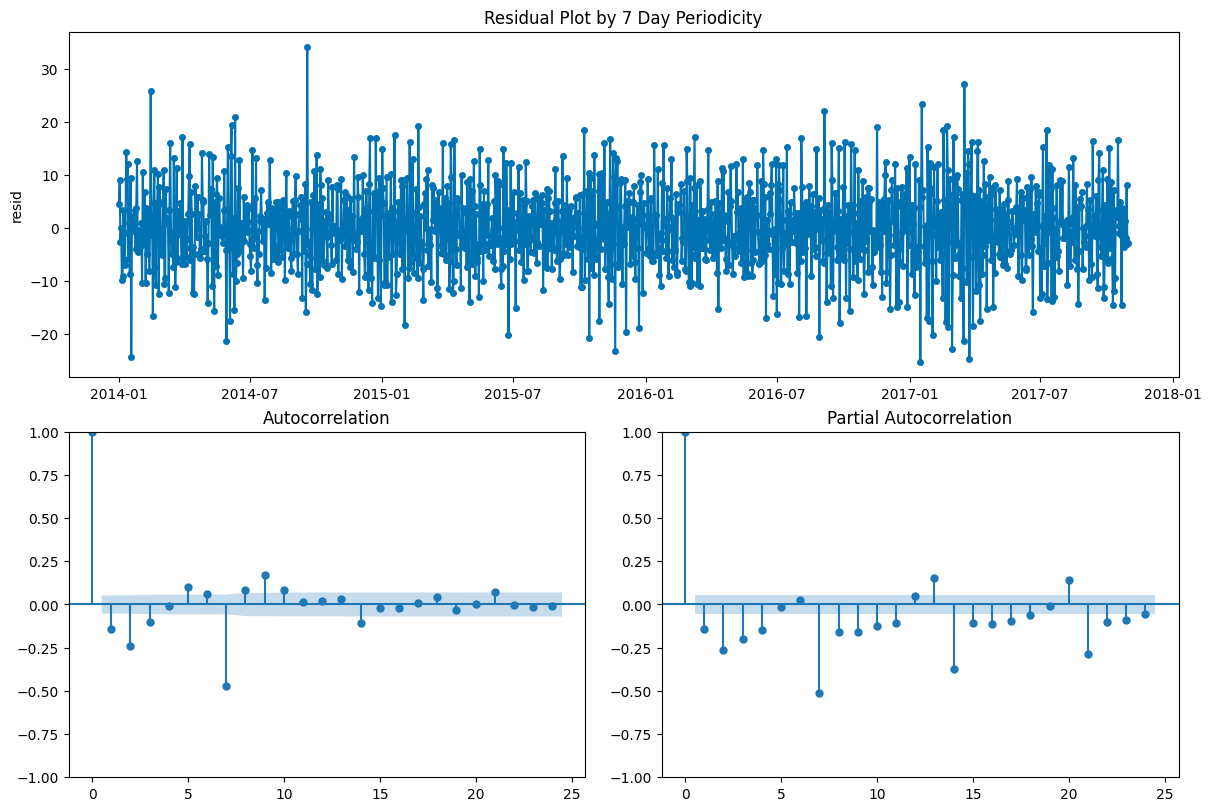

In [ ]:
# periodicity of 7 days

# separate the trend, seasonal and residual noise components
decomposer1 = STLTransformer(sp=7, return_components=True)

result1 = decomposer1.fit_transform(ed)
result1.plot()
plt.title('Trend, Seasonal and Residual Noise Components by 7 Day Periodicity')

# display each components
plt.figure()
plt.plot(result1.trend)
plt.title('Trend Component by 7 Day Periodicity')

plt.figure()
plt.plot(result1.seasonal)
plt.title('Seasonal Component by 7 Day Periodicity')

plt.figure()
plt.plot(result1.resid)
plt.title('Residual Noise Component by 7 Day Periodicity')

# plot the residuals
plt.figure()
plt.scatter(result1.resid.index, result1.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Scatter Plot by 7 Day Periodicity')

plt.figure()
plt.hist(result1.resid, bins=25, density=True)
mu, std = norm.fit(result1.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Residual Histogram by 7 Day Periodicity')

_ = sm.qqplot(result1.resid, line='r')
plt.title('Residual QQ Plot by 7 Day Periodicity')

plot_correlations(result1.resid, series_title='Residual Plot by 7 Day Periodicity')

plt.show()

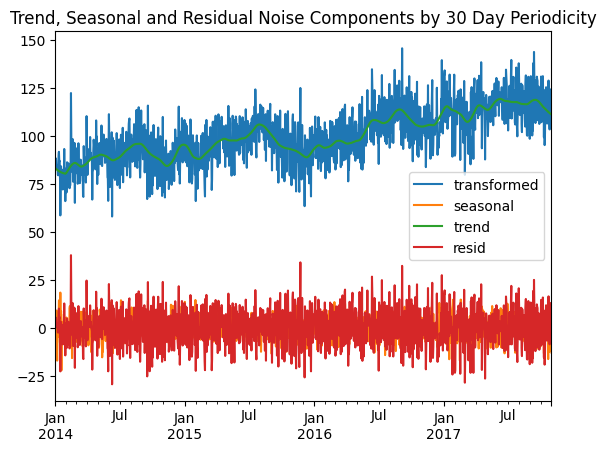

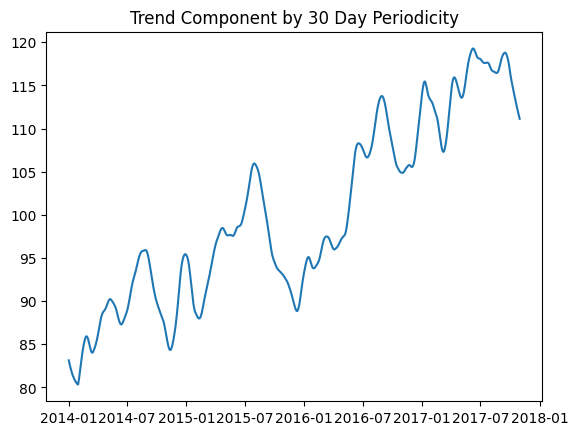

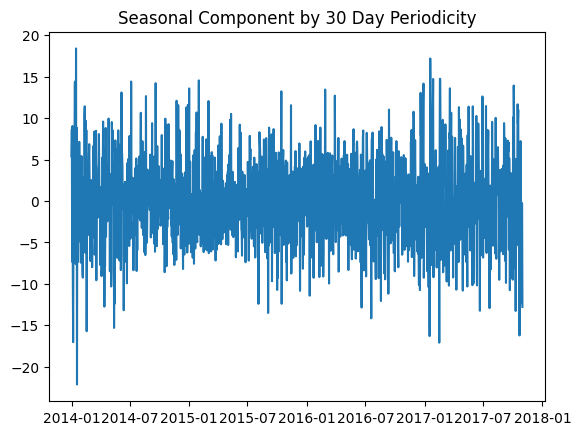

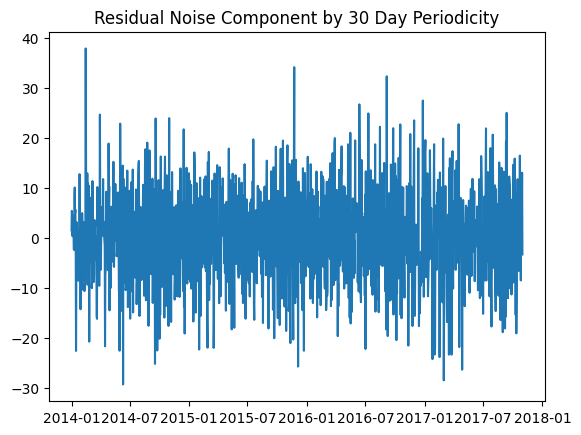

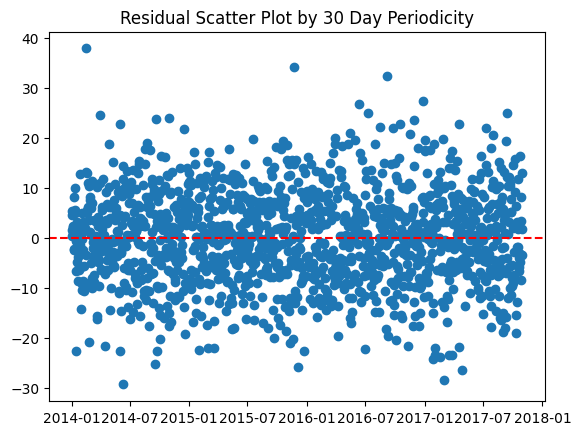

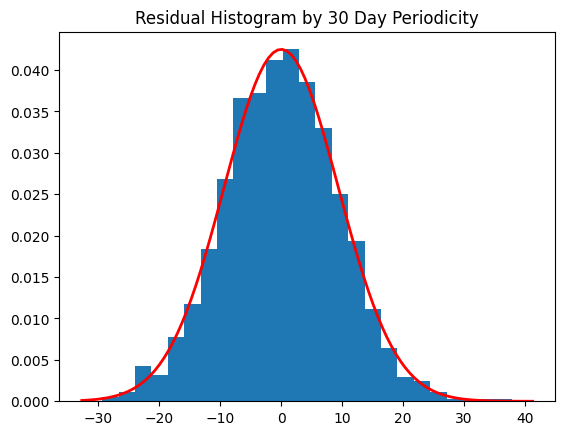

<Figure size 640x480 with 0 Axes>

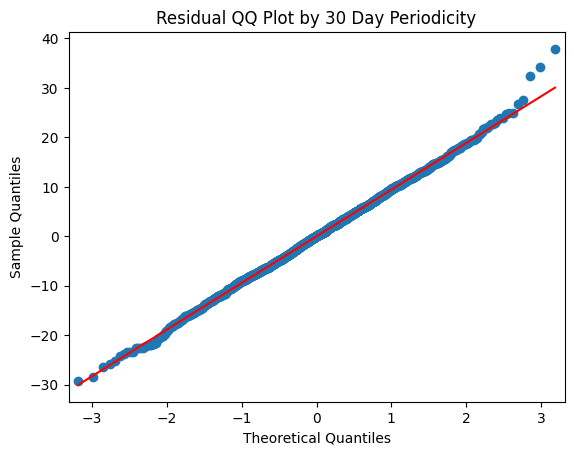

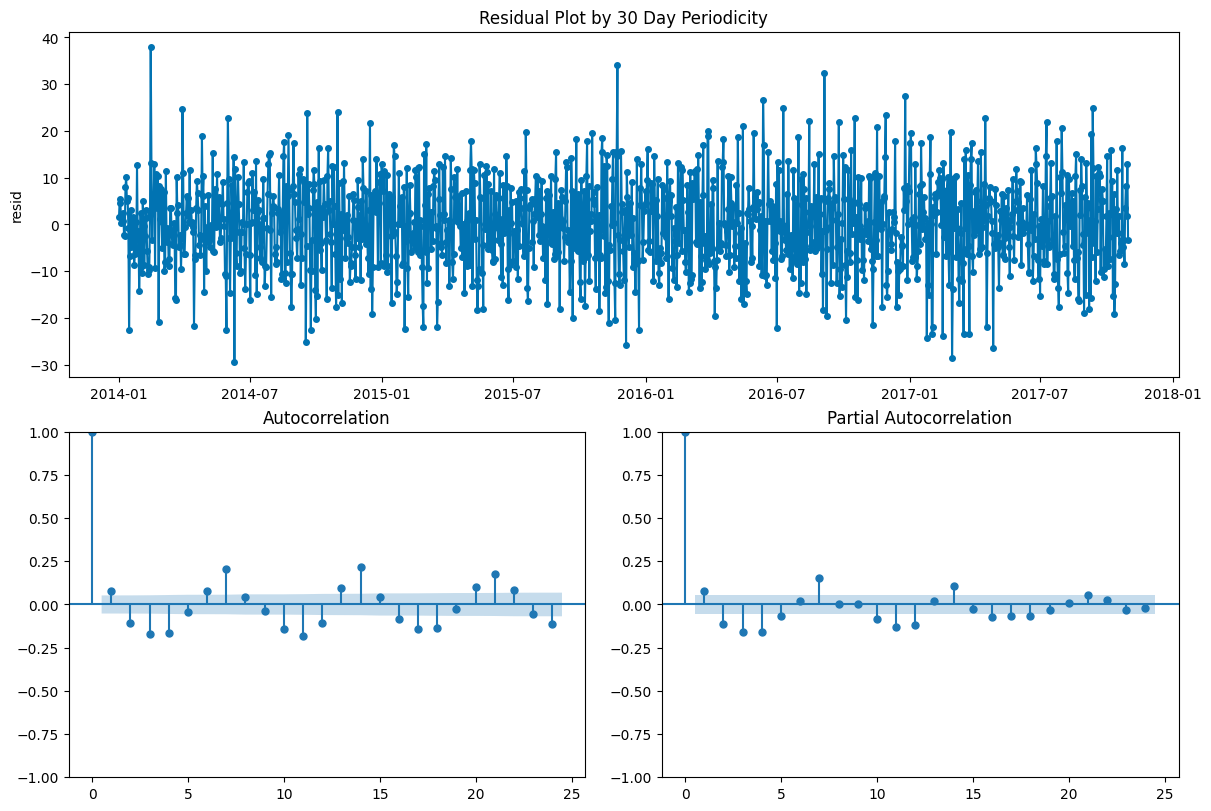

In [ ]:
# periodicity of 30 days

# separate the trend, seasonal and residual noise components
decomposer2 = STLTransformer(sp=30, return_components=True)

result2 = decomposer2.fit_transform(ed)
result2.plot()
plt.title('Trend, Seasonal and Residual Noise Components by 30 Day Periodicity')

# display each components
plt.figure()
plt.plot(result2.trend)
plt.title('Trend Component by 30 Day Periodicity')

plt.figure()
plt.plot(result2.seasonal)
plt.title('Seasonal Component by 30 Day Periodicity')

plt.figure()
plt.plot(result2.resid)
plt.title('Residual Noise Component by 30 Day Periodicity')

# plot the residuals
plt.figure()
plt.scatter(result2.resid.index, result2.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Scatter Plot by 30 Day Periodicity')

plt.figure()
plt.hist(result2.resid, bins=25, density=True)
mu, std = norm.fit(result2.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Residual Histogram by 30 Day Periodicity')

plt.figure()
_ = sm.qqplot(result2.resid, line='r')
plt.title('Residual QQ Plot by 30 Day Periodicity')

plot_correlations(result2.resid, series_title='Residual Plot by 30 Day Periodicity')

plt.show()

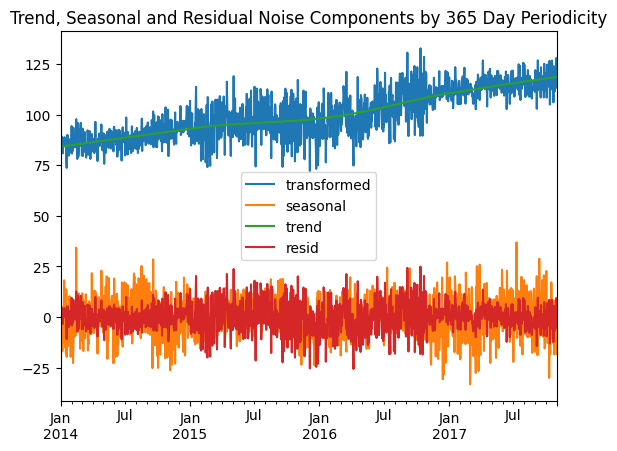

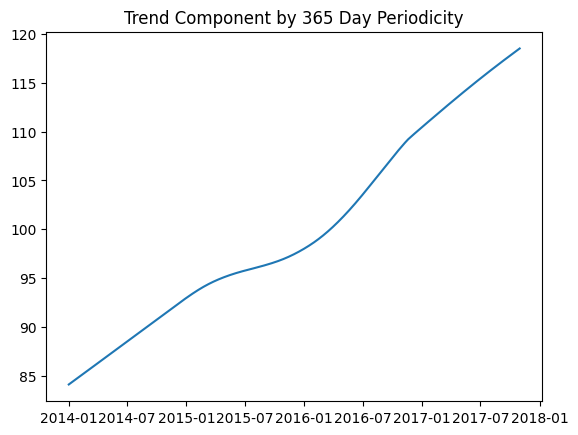

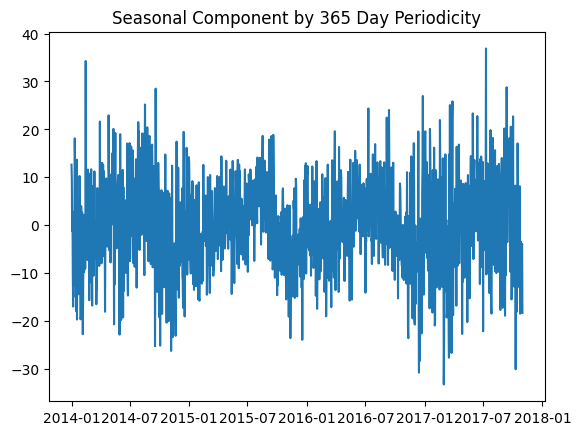

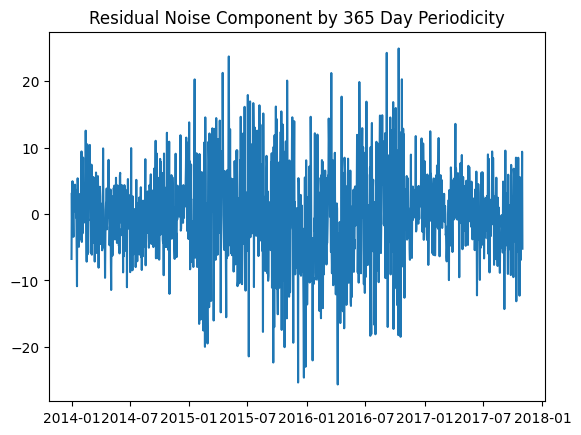

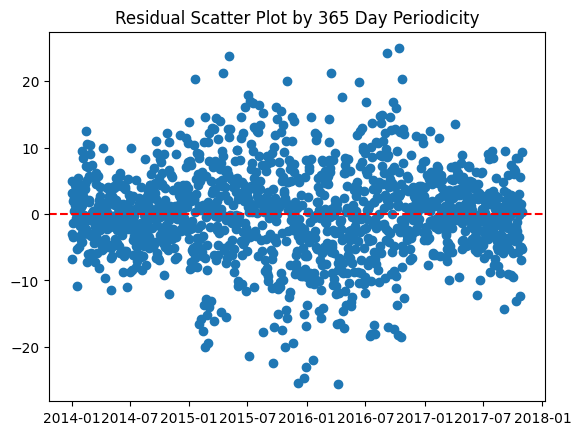

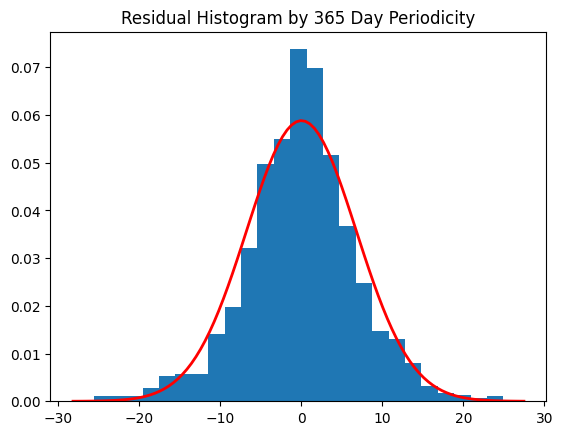

<Figure size 640x480 with 0 Axes>

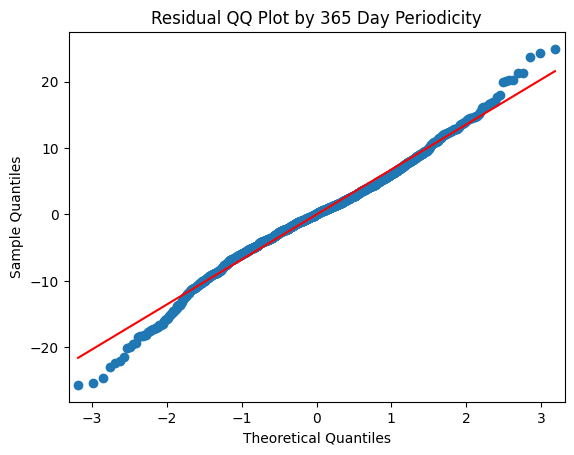

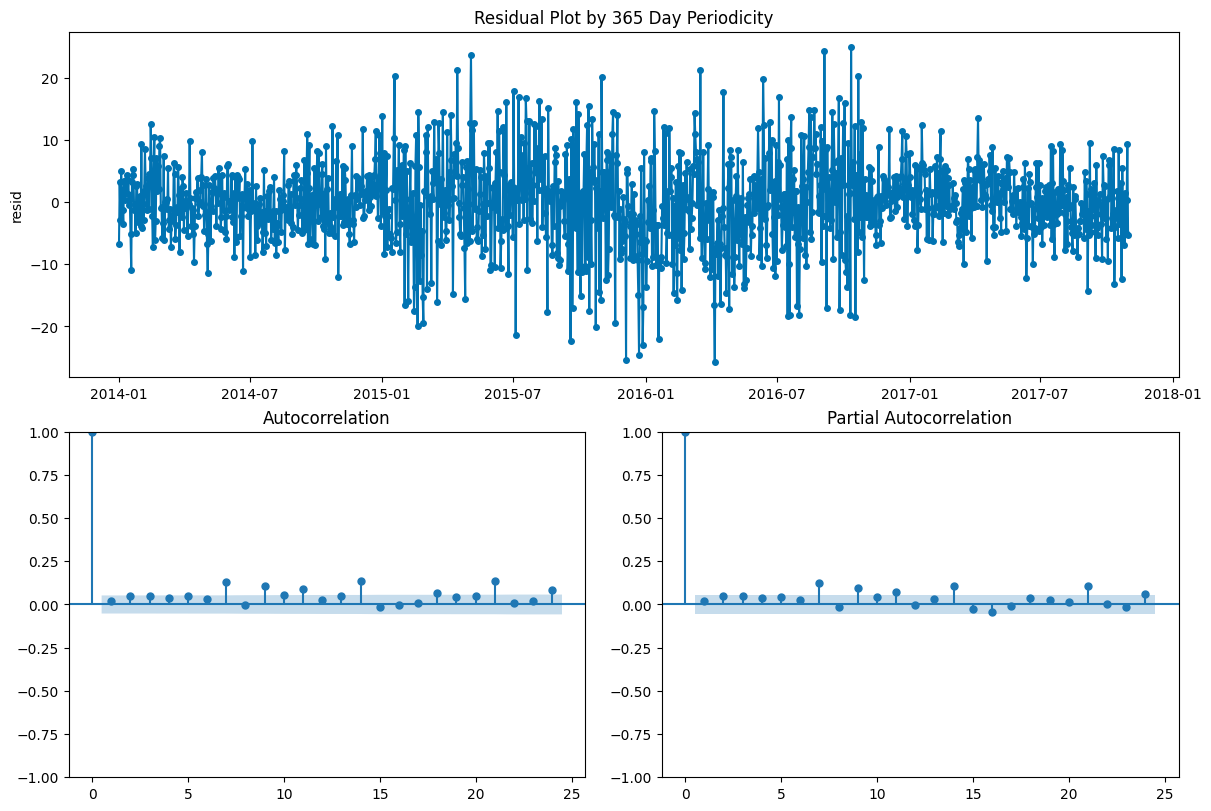

In [ ]:
# periodicity of 365 days

# separate the trend, seasonal and residual noise components
decomposer3 = STLTransformer(sp=365, return_components=True)

result3 = decomposer3.fit_transform(ed)
result3.plot()
plt.title('Trend, Seasonal and Residual Noise Components by 365 Day Periodicity')

# display each components
plt.figure()
plt.plot(result3.trend)
plt.title('Trend Component by 365 Day Periodicity')

plt.figure()
plt.plot(result3.seasonal)
plt.title('Seasonal Component by 365 Day Periodicity')

plt.figure()
plt.plot(result3.resid)
plt.title('Residual Noise Component by 365 Day Periodicity')

# plot the residuals
plt.figure()
plt.scatter(result3.resid.index, result3.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Scatter Plot by 365 Day Periodicity')

plt.figure()
plt.hist(result3.resid, bins=25, density=True)
mu, std = norm.fit(result3.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Residual Histogram by 365 Day Periodicity')

plt.figure()
_ = sm.qqplot(result3.resid, line='r')
plt.title('Residual QQ Plot by 365 Day Periodicity')

plot_correlations(result3.resid, series_title='Residual Plot by 365 Day Periodicity')

plt.show()

Your answer goes here

The periodicity of 30 days is preferred over 7 days and 365 days.

While the plots of the residuals by 7 days and 30 days both show constant mean and variance, the plot of the residuals by 365 days has higher variance in the middle of the time series. Thus, there is some unexplained fluctuation not captured by a long periodicity.

From the autocorrelation and partial autocorrelation plots, there are still some cyclic patterns unaccounted which repeat and extend over time. Especially in the plots by a periodicity of 7 days, there is a high peak at around 7th lag. While there has not seen spikes in the periodicity of 30 days and 365 days, they present coefficient higher than the significant threshold at around 7th and at later repeated cyclic lags. The cyclic effects are still present in the residuals.

By looking at the residual plots, the periodicity of 30 days has residuals more evenly scattered around the residual = 0 line. Meanwhile, the residual plots of 7 days have a tendency to centered around the residual = 0 line, and the residual plots of 365 have clustered around the earlier and later timestamps.

By checking the histograms and Q-Q plots, the periodicity of 30 days shows more standard normal distribution by aligning better with the normal distribution curve and with the theoretical quantiles. It suggests that the residuals are more randomly distributed.

3. [5 points] This question is on time series forecasting with Exponential Smoothing. Begin by spliting the
time series into train and test sets. Fit an exponential smoothing model on the dataset. Evaluate your
forecasting accuracy on two different forecasting horizons (7 days and 30 days) by computing
the mean absolute percentage error. Plot the train, test set and your predicted solution. Label
your plot.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


The mean absolute percentage error: 0.07826940624262094


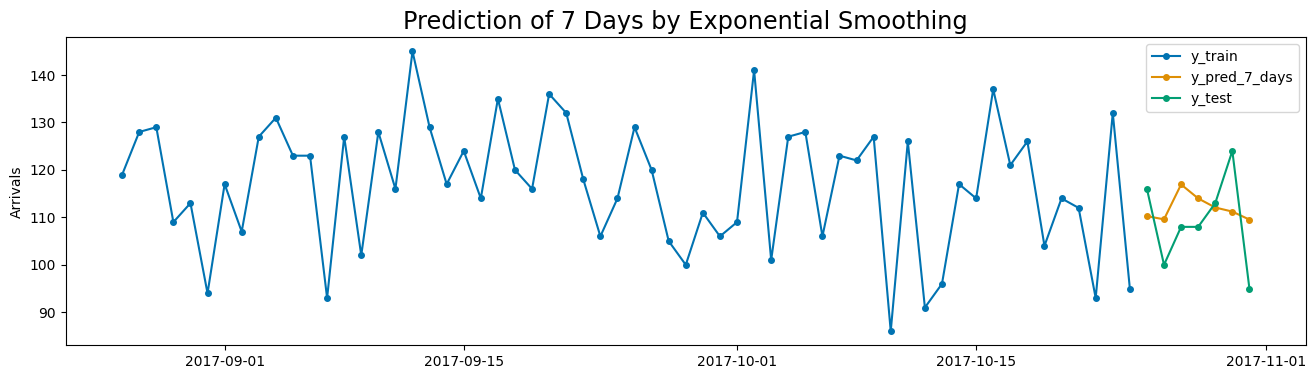

In [ ]:
# forecasting horizon of 7 days

# split the data
test_size = 7
fh = np.arange(1, test_size+1)
y_train, y_test = temporal_train_test_split(ed, test_size=test_size)

# fit a Holt-Winters seasonal exponential smoothing model
exp_smooth = ExponentialSmoothing(
    trend='add',
    seasonal='multiplicative',
    sp=30
    )
exp_smooth.fit(y_train)
y_temp = exp_smooth.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, test set and prediction
plot_series(y_train.tail(60), y_pred, y_test, labels=['y_train', 'y_pred_7_days', 'y_test'], title='Prediction of 7 Days by Exponential Smoothing')
plt.show()

The mean absolute percentage error: 0.11327818111859794


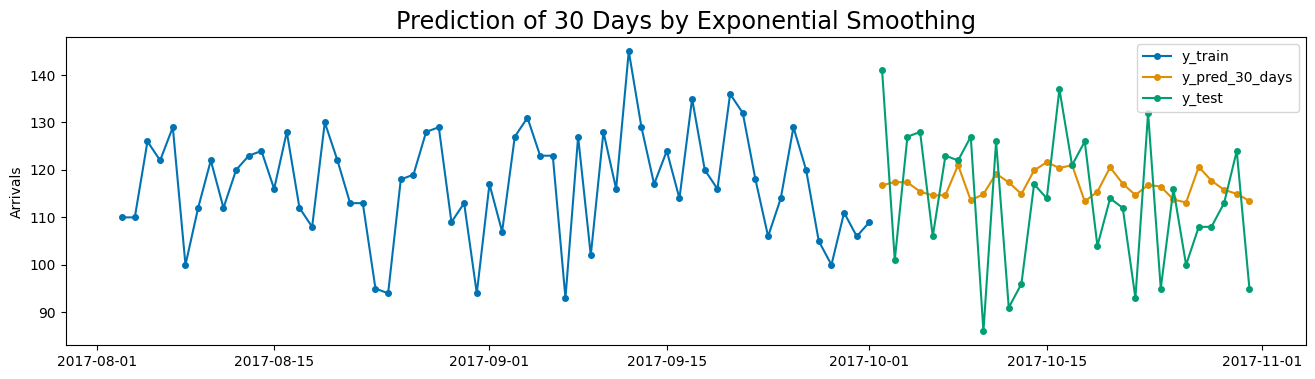

In [ ]:
# forecasting horizon of 30 days

# split the data into training and test sets
test_size = 30
fh = np.arange(1, test_size+1)
y_train, y_test = temporal_train_test_split(ed, test_size=test_size)

# fit a Holt-Winters seasonal exponential smoothing model
exp_smooth = ExponentialSmoothing(
    trend='add',
    seasonal='multiplicative',
    sp=30
    )
exp_smooth.fit(y_train.values)
y_temp = exp_smooth.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, test set and prediction
plot_series(y_train.tail(60), y_pred, y_test, labels=['y_train', 'y_pred_30_days', 'y_test'], title='Prediction of 30 Days by Exponential Smoothing')
plt.show()

4. [15 points]  This question is on time series forecasting with ARIMA
* Split the time series into a train, validation and test set. (2 points)
* Fit an ARIMA or SARIMA model on the training set. Find the optimal p, d and q values for ARIMA (by evaluating the mean absolute percentage error on the validation set). Chose  at least different values for p and 2 different values for d and q. (6 points)
* With the best p, d and q values you found, fit an ARIMA model on the combined train and validation set. Evaluate your model on two different forecasting horizons (7 days or 30 days) using the mean absolute percentage error.(6 points)
* Display the train, validation, test set and your predicted solution. Label your plot. (1 points)

Note that as we have to different forecasting horizons, you may chose to create two different train and test sets; one for a 7 day forecast and one for a 30 day.

In [ ]:
# forecasting horizon of 7 days

# split the data into training and test sets
test_size = 7
fh = np.arange(1, test_size+1)
y_trainval, y_test = temporal_train_test_split(ed, test_size=test_size)
y_train, y_val = temporal_train_test_split(y_trainval, test_size=test_size)

# fit an ARIMA model and find the optimial p, d and q values
p_values = [3, 7, 14, 30]
d_values = [0, 1]
q_values = [0, 1, 2]
best_score, best_cfg = float('inf'), None

for arima_order in product(p_values, d_values, q_values):
  try:
    forecaster = ARIMA(order=arima_order, suppress_warnings=True)
    forecaster.fit(y_train)
    y_temp = forecaster.predict(fh=fh)
    y_pred = y_val.copy()
    y_pred['Arrivals'] = y_temp

    mape = MeanAbsolutePercentageError(symmetric=False)
    result = mape(y_val, y_pred)
    if result < best_score:
      best_score, best_cfg = result, arima_order
  except Exception:
    continue

print('The best configuration is {} with mapa: {}'.format(best_cfg, best_score))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

The best configuration is (3, 0, 0) with mapa: 0.09934163919462206


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The mean absolute percentage error: 0.09098310157283228


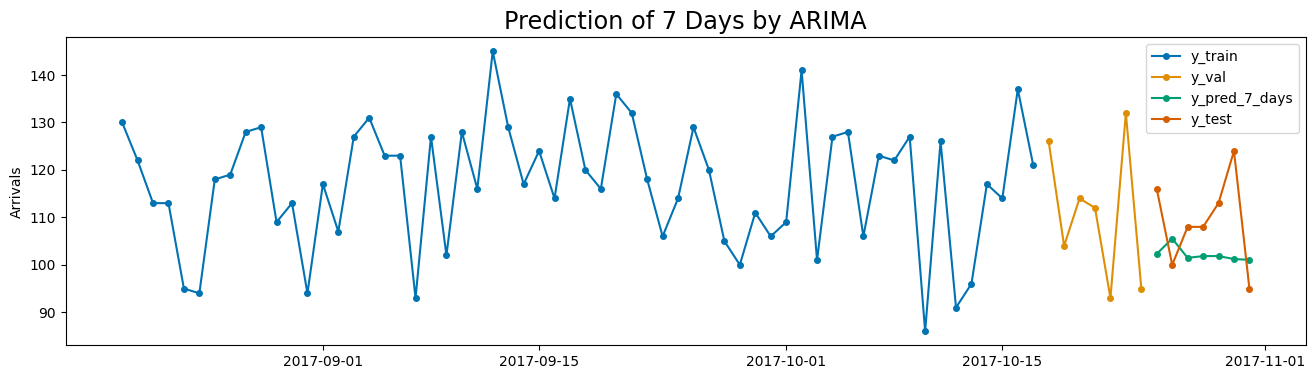

In [ ]:
# refit the ARIMA model
forecaster = ARIMA(order=best_cfg, suppress_warnings=True)
forecaster.fit(y_trainval)
y_temp = forecaster.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, validation, test set and prediction
plot_series(y_train.tail(60), y_val, y_pred, y_test, labels=['y_train', 'y_val', 'y_pred_7_days', 'y_test'], title='Prediction of 7 Days by ARIMA')
plt.show()

In [ ]:
# forecasting horizon of 30 days

# split the data into training and test sets
test_size = 30
fh = np.arange(1, test_size+1)
y_trainval, y_test = temporal_train_test_split(ed, test_size=test_size)
y_train, y_val = temporal_train_test_split(y_trainval, test_size=test_size)

# fit an ARIMA model and find the optimial p, d and q values
p_values = [3, 7, 14, 30]
d_values = [0, 1]
q_values = [0, 1, 2]
best_score, best_cfg = float('inf'), None

for arima_order in product(p_values, d_values, q_values):
  try:
    forecaster = ARIMA(order=arima_order, suppress_warnings=True)
    forecaster.fit(y_train)
    y_temp = forecaster.predict(fh=fh)
    y_pred = y_val.copy()
    y_pred['Arrivals'] = y_temp

    mape = MeanAbsolutePercentageError(symmetric=False)
    result = mape(y_val, y_pred)
    if result < best_score:
      best_score, best_cfg = result, arima_order
  except Exception:
    continue

print('The best configuration is {} with mapa: {}'.format(best_cfg, best_score))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

The best configuration is (7, 1, 2) with mapa: 0.08436035761431898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The mean absolute percentage error: 0.11816958751547192


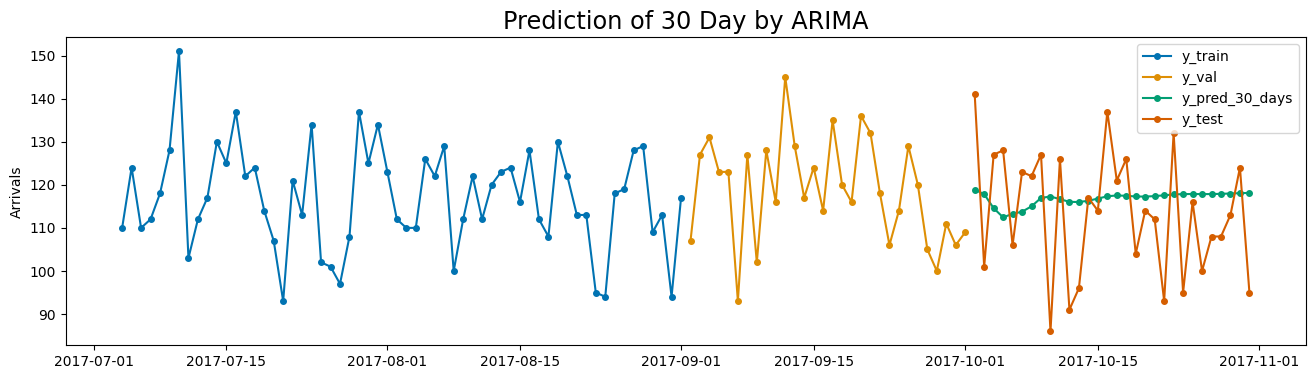

In [ ]:
# refit the ARIMA model
forecaster = ARIMA(order=best_cfg, suppress_warnings=True)
forecaster.fit(y_trainval)
y_temp = forecaster.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, validation, test set and prediction
plot_series(y_train.tail(60), y_val, y_pred, y_test, labels=['y_train', 'y_val', 'y_pred_30_days', 'y_test'], title='Prediction of 30 Day by ARIMA')
plt.show()

5. (7 points) This question is on time series regression with K-Nearest Neighbour using the sklearn or sktime package.
* Split the time series into a train and test set. Using `GridSearchCV`, train a KNN regessor with a 5-fold cross validation. Find the best regularization (nearest neighbour) hyperparameter with 5 different neighbour values. (3 points)
* Using the best hyperparameter found from grid search on the training set, evaluate the mean absolute percentage error on the test set. (When you call grid search.fit, the best hyperparameter is automatically found and stored in grid search). (3 points)
* Display the train and test set and your predicted solution. Label your plot. (1 point)

In [ ]:
# define the function to prepare time series for regression
def split_into_train_test(data, in_num, fh):
    """
    Splits the series into train and test sets.

    Each step takes multiple points as inputs
    :param data: an individual TS
    :param fh: number of out of sample points
    :param in_num: number of input points for the forecast
    :return:
    """
    train, test = data[:-fh], data[-(fh + in_num) :]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = test[:-1], np.roll(test, -in_num)[:-in_num]
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    for _ in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return x_train, y_train, x_test, y_test

In [ ]:
# forecasting horizon of 7 days

# split the data
test_size = 7
fh = np.arange(1, test_size+1)
X_train, y_train, X_test, y_test = split_into_train_test(ed, 14, len(fh))
print(X_train.shape, y_train.shape)

# grid search for K values
eucl_dist = FlatDist(ScipyDist())
regressor = KNeighborsRegressor()
param_grid = {'n_neighbors': [1, 3, 5, 7, 14]}

GSCV = GridSearchCV(regressor,
                    param_grid=param_grid,
                    cv=KFold(n_splits=5),
                    scoring='neg_mean_absolute_percentage_error',
                    verbose=1)
GSCV.fit(X_train, y_train)
print(GSCV.best_params_, GSCV.best_score_)

(1379, 14) (1379, 1)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 14} -0.10183456828974431


The mean absolute percentage error: 0.08491364257335697


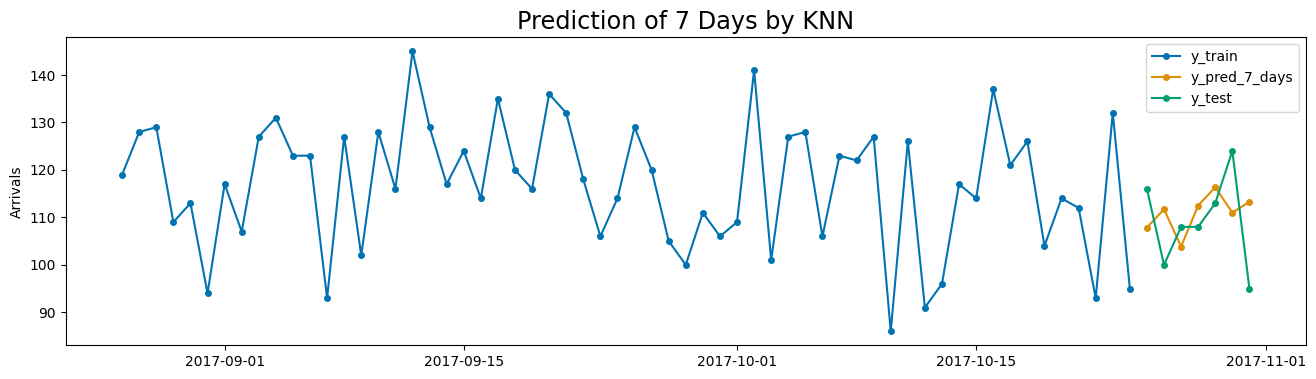

In [ ]:
# refit and evaluate the best parameter
test_size = 7
fh = np.arange(1, test_size+1)
y_train, y_test = temporal_train_test_split(ed, test_size=test_size)

regressor = GSCV.best_estimator_
forecaster = make_reduction(regressor, window_length=14, strategy="recursive")
forecaster.fit(y_train)

y_temp = forecaster.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, validation, test set and prediction
plot_series(y_train.tail(60), y_pred, y_test, labels=['y_train', 'y_pred_7_days', 'y_test'], title='Prediction of 7 Days by KNN')
plt.show()

In [ ]:
# forecasting horizon of 30 days

# split the data
test_size = 30
fh = np.arange(1, test_size+1)
X_train, y_train, X_test, y_test = split_into_train_test(ed, 60, len(fh))
print(X_train.shape, y_train.shape)

# grid search for K values
eucl_dist = FlatDist(ScipyDist())
regressor = KNeighborsRegressor()
param_grid = {'n_neighbors': [1, 3, 5, 7, 14]}

GSCV = GridSearchCV(regressor,
                    param_grid=param_grid,
                    cv=KFold(n_splits=5),
                    scoring='neg_mean_absolute_percentage_error',
                    verbose=1)
GSCV.fit(X_train, y_train)
print(GSCV.best_params_, GSCV.best_score_)

(1310, 60) (1310, 1)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 14} -0.1051126894401638


The mean absolute percentage error: 0.11593352016073293


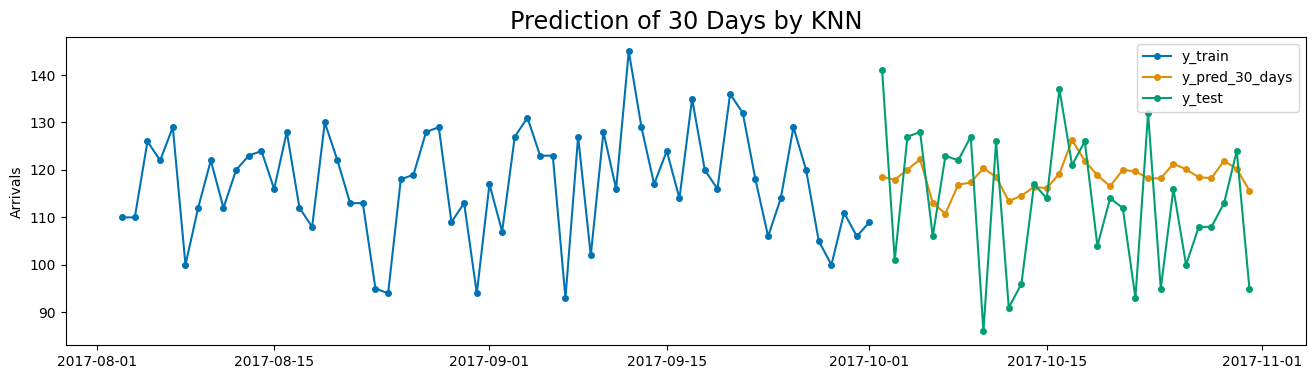

In [ ]:
# refit and evaluate the best parameter
test_size = 30
fh = np.arange(1, test_size+1)
y_train, y_test = temporal_train_test_split(ed, test_size=test_size)

regressor = GSCV.best_estimator_
forecaster = make_reduction(regressor, window_length=30, strategy="recursive")
forecaster.fit(y_train)

y_temp = forecaster.predict(fh=fh)
y_pred = y_test.copy()
y_pred['Arrivals'] = y_temp

# compute the mean absolute percentage error
mape = MeanAbsolutePercentageError(symmetric=False)
print('The mean absolute percentage error:', mape(y_test, y_pred))

# plot the train, validation, test set and prediction
plot_series(y_train.tail(60), y_pred, y_test, labels=['y_train', 'y_pred_30_days', 'y_test'], title='Prediction of 30 Days by KNN')
plt.show()